# Machine Learning in Python - Project 1

Due Friday, Feb 28th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here, define any functions if neeed, and load data*

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [2]:
# Load data in easyshare.csv
d = pd.read_csv("adnidata.csv")
d.head()

,Unnamed: 0,RID,ADAS13.bl,ADAS13.m24,AGE,DX.bl,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,1,3,31.00,37.67,81.3,AD,Male,18,Not Hisp/Latino,White,Married,1.0,84599.0,5319.0,1129834.0,1791.0,15506.0,18422.0,1.920691e+06
1,2,5,14.67,11.00,73.7,CN,Male,16,Not Hisp/Latino,White,Married,0.0,34062.0,7075.0,1116633.0,4433.0,24788.0,21614.0,1.640766e+06
2,3,6,25.67,22.67,80.4,LMCI,Female,13,Not Hisp/Latino,White,Married,0.0,39826.0,5348.0,927510.0,2277.0,17963.0,17802.0,1.485834e+06
3,4,7,40.33,47.00,75.4,AD,Male,10,Hisp/Latino,More than one,Married,1.0,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,1.353519e+06
4,5,10,24.33,30.33,73.9,AD,Female,12,Not Hisp/Latino,White,Married,1.0,26820.0,5485.0,1033542.0,2676.0,16761.0,19741.0,1.471184e+06


# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. Alzheimer's Association, Health Institutes and/or other Charities on dementia and ageing).*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft and the appropriate type of plot and summary for each variable type - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [3]:
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1038 non-null   int64  
 1   RID          1038 non-null   int64  
 2   ADAS13.bl    1038 non-null   float64
 3   ADAS13.m24   1038 non-null   float64
 4   AGE          1038 non-null   float64
 5   DX.bl        1038 non-null   object 
 6   PTGENDER     1038 non-null   object 
 7   PTEDUCAT     1038 non-null   int64  
 8   PTETHCAT     1038 non-null   object 
 9   PTRACCAT     1038 non-null   object 
 10  PTMARRY      1038 non-null   object 
 11  APOE4        1033 non-null   float64
 12  Ventricles   891 non-null    float64
 13  Hippocampus  891 non-null    float64
 14  WholeBrain   890 non-null    float64
 15  Entorhinal   891 non-null    float64
 16  Fusiform     891 non-null    float64
 17  MidTemp      891 non-null    float64
 18  ICV          1030 non-null   float64
dtypes: flo

,Unnamed: 0,RID,ADAS13.bl,ADAS13.m24,AGE,PTEDUCAT,APOE4,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1033.000000,891.000000,891.000000,8.900000e+02,891.000000,891.000000,891.000000,1.030000e+03
mean,519.500000,1957.896917,15.644123,18.363025,74.062717,15.963391,0.540174,38604.586981,6848.867565,1.026765e+06,3514.277217,17322.850730,19618.152637,1.539285e+06
std,299.789093,1678.408345,8.530947,13.073851,7.018850,2.831598,0.656351,21781.692877,1195.621551,1.115823e+05,792.695809,2740.084064,3037.185011,1.631243e+05
min,1.000000,3.000000,0.000000,0.000000,55.000000,6.000000,0.000000,5650.000000,3548.000000,7.388130e+05,1426.000000,8991.000000,10234.000000,1.116279e+06
25%,260.250000,557.250000,9.000000,8.670000,70.000000,14.000000,0.000000,23139.500000,5998.000000,9.519980e+05,2971.500000,15469.000000,17605.500000,1.423128e+06
50%,519.500000,1173.000000,14.000000,15.000000,73.950000,16.000000,0.000000,33596.000000,6906.000000,1.025733e+06,3568.000000,17255.000000,19531.000000,1.526441e+06
75%,778.750000,4141.750000,21.000000,25.670000,79.300000,18.000000,1.000000,48682.500000,7692.500000,1.099261e+06,4084.000000,19004.500000,21666.000000,1.645128e+06
max,1038.000000,4696.000000,51.000000,71.000000,91.400000,20.000000,2.000000,147064.000000,10769.000000,1.443991e+06,5731.000000,26280.000000,29435.000000,2.072473e+06


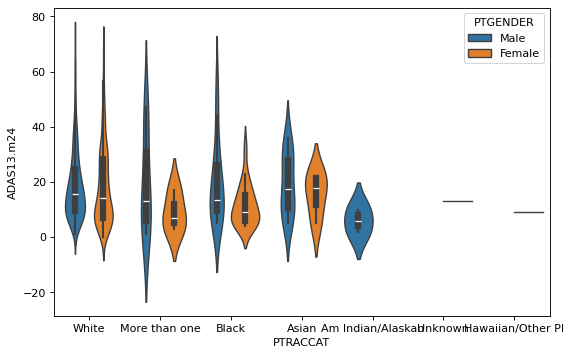

In [4]:
# Violin plot for discrete variables
sns.violinplot(data=d, x='PTRACCAT', y='ADAS13.m24', hue='PTGENDER')
plt.show()

# # Or a strip plot
# sns.stripplot(data=df_insurance, x='children', y='charges', hue='smoker')
# plt.show()

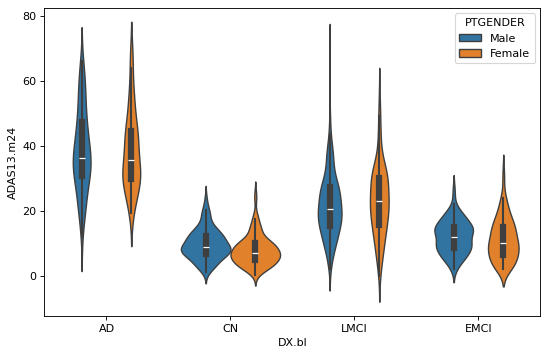

In [5]:
# Violin plot for discrete variables
sns.violinplot(data=d, x='DX.bl', y='ADAS13.m24', hue='PTGENDER')
plt.show()

# # Or a strip plot
# sns.stripplot(data=df_insurance, x='children', y='charges', hue='smoker')
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

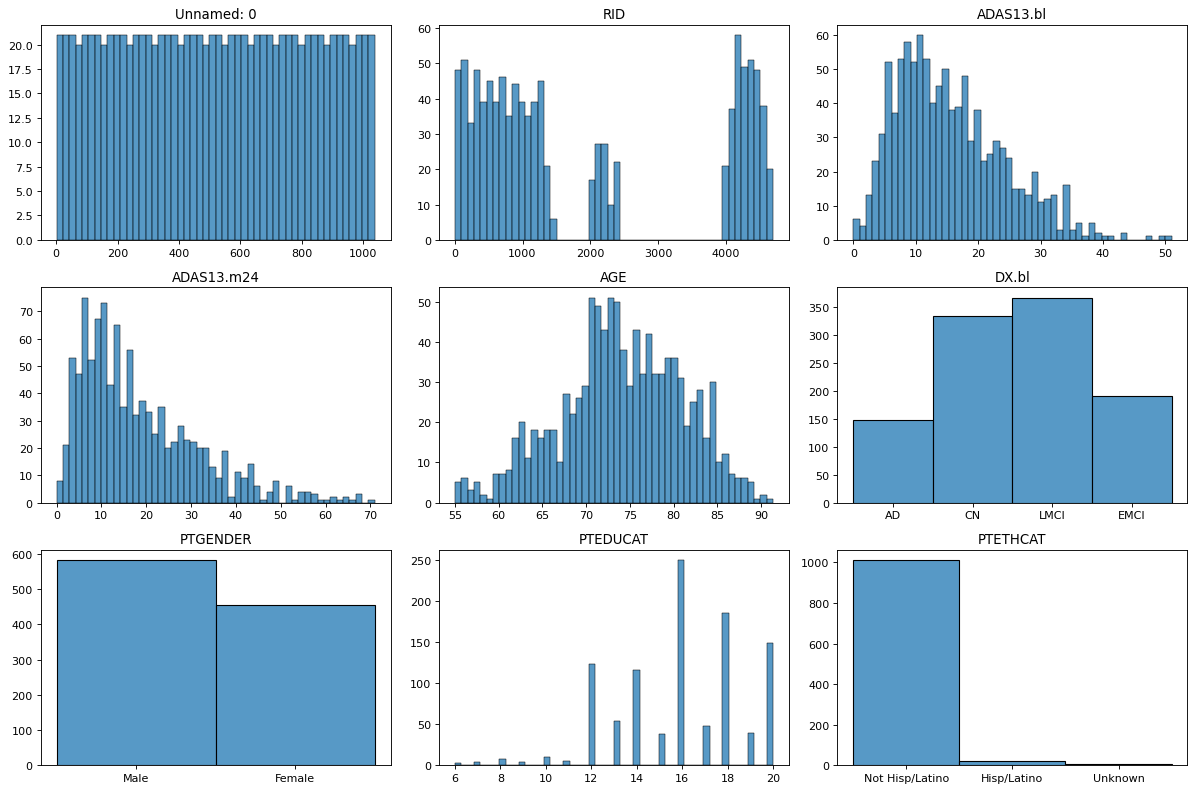

In [6]:
fig,axes=plt.subplots(figsize=(15,10),ncols=3,nrows=3)
axes=axes.flatten()
for i, ax in enumerate(axes):
    sns.histplot(data=d.iloc[:,i], bins=50, ax=ax)
    ax.set_title(d.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show    


We can see that the features all have very different scales --> standardization ?\
some of the histograms are heavy-tailed 

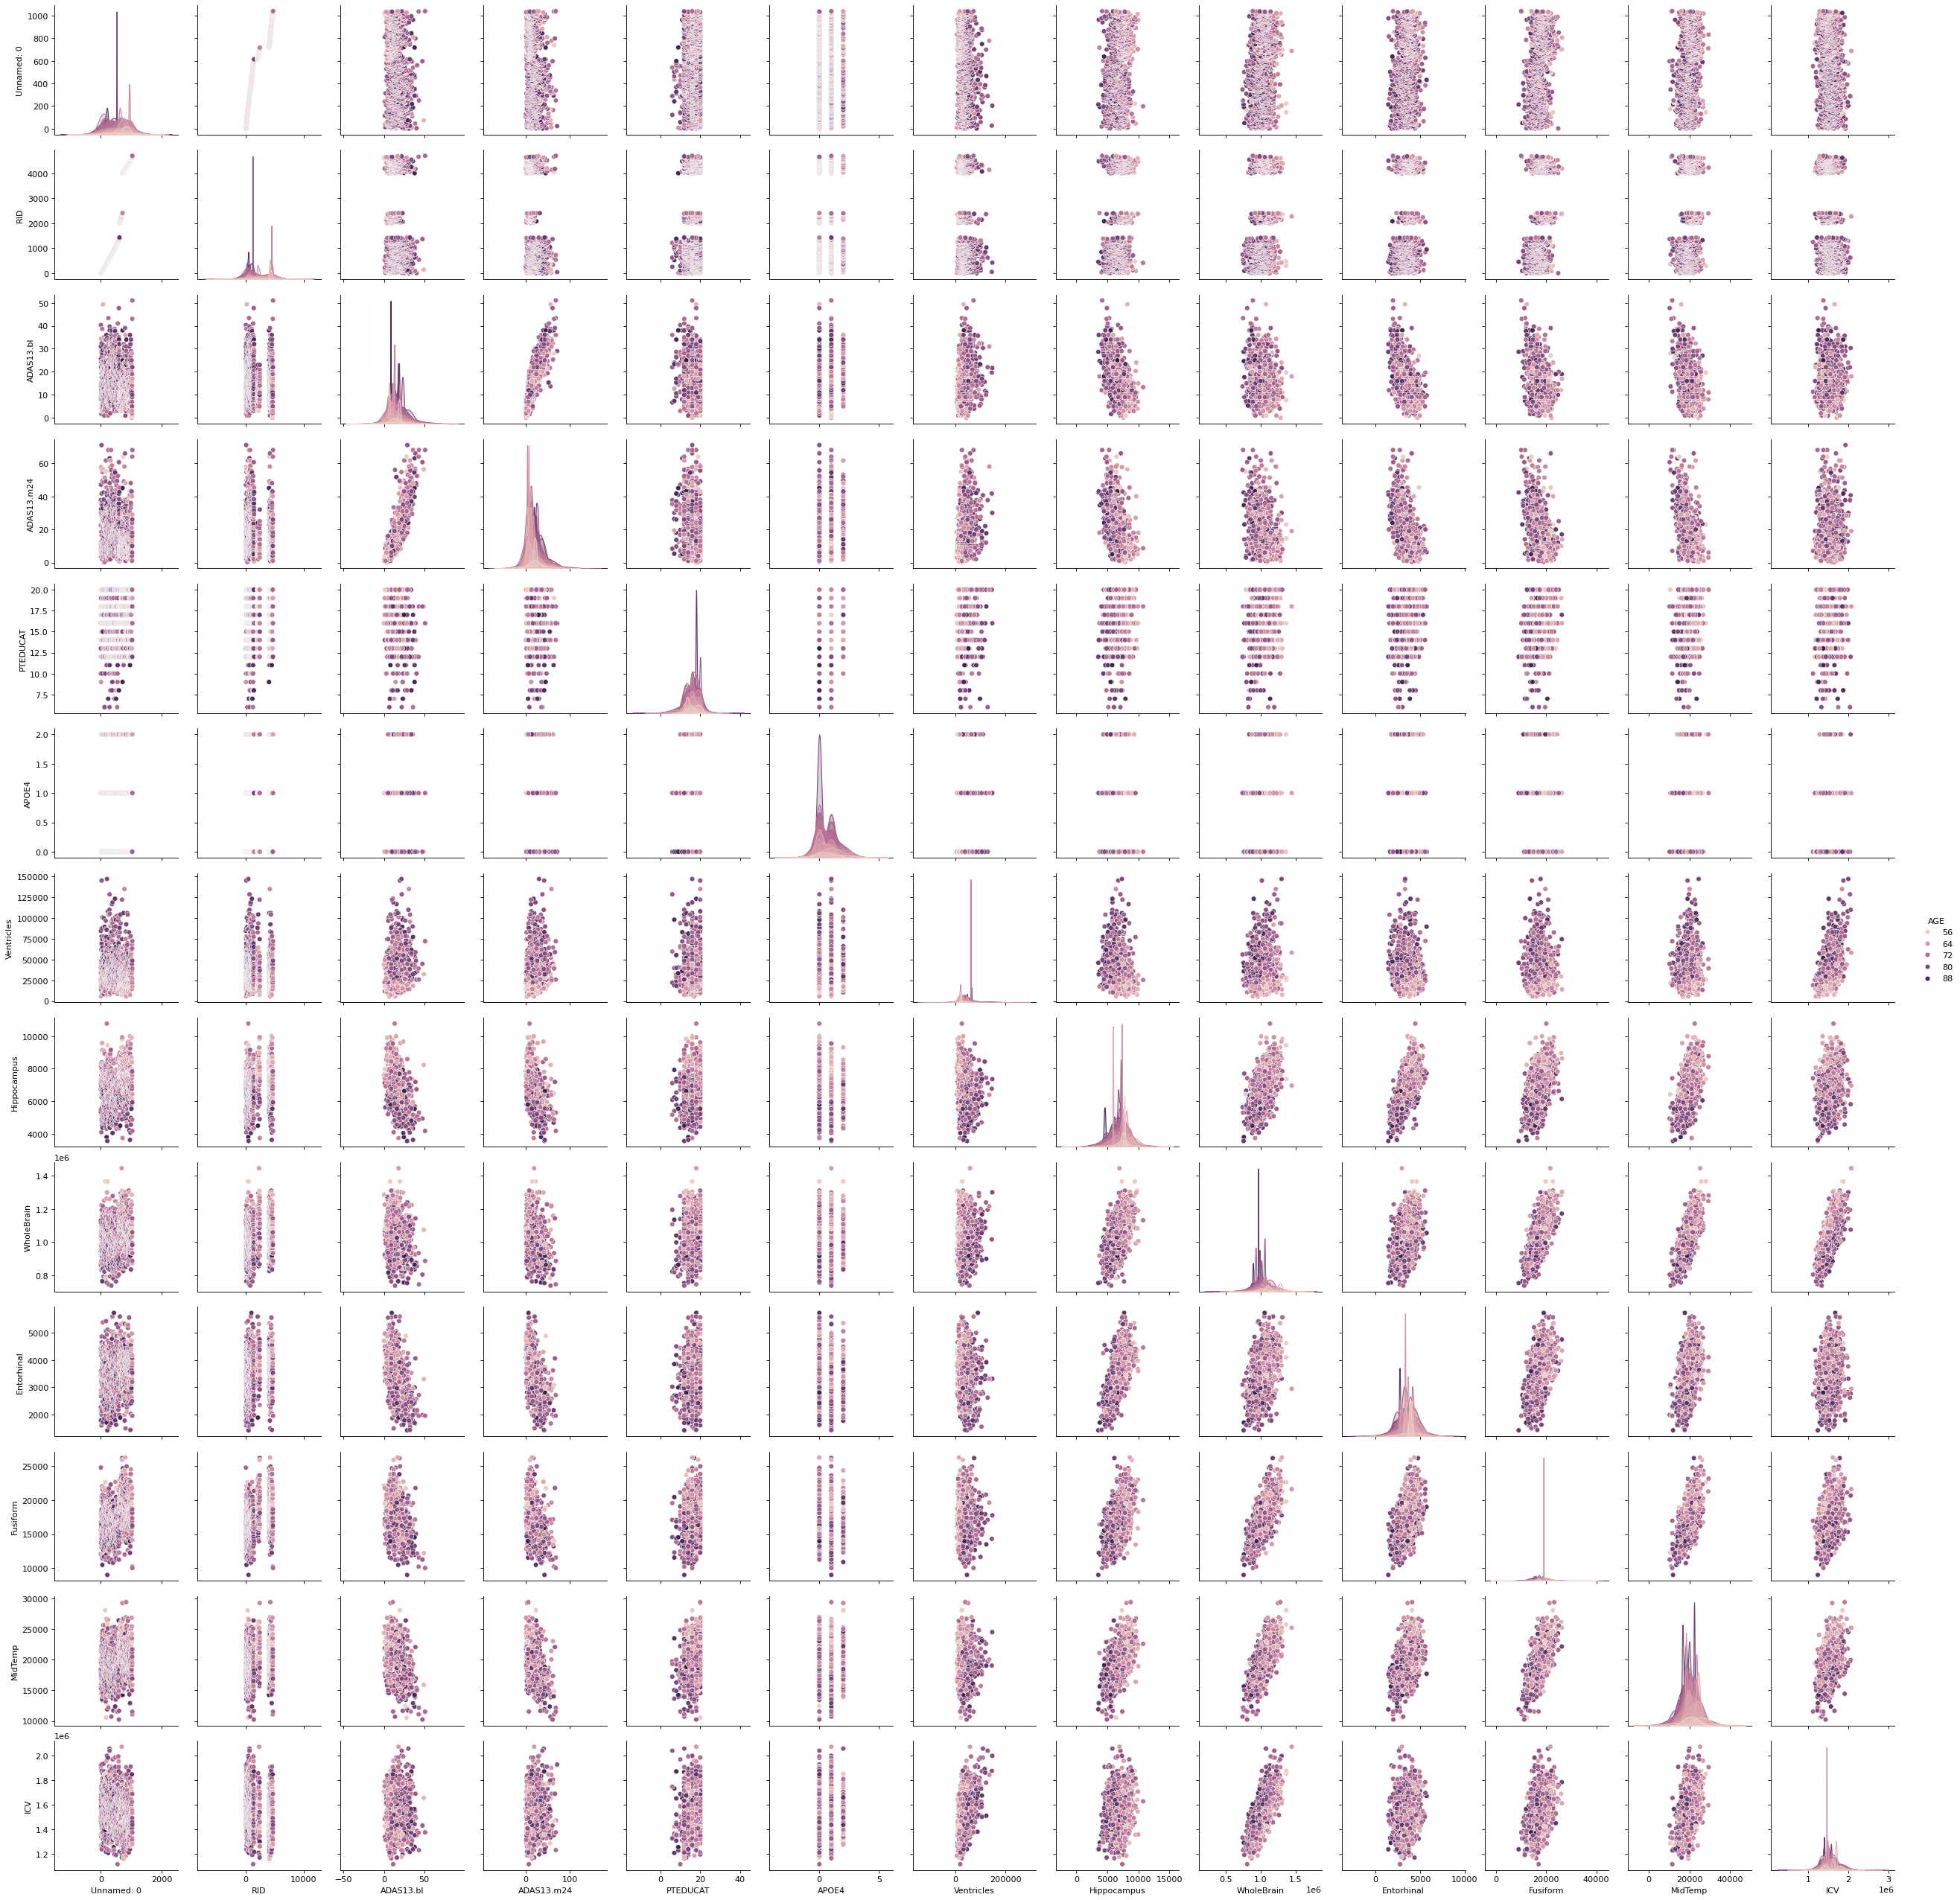

In [7]:
sns.pairplot(data= d, hue='AGE')
plt.show()

In [8]:
#THE CORRELATION VALUES
d.corr(numeric_only=True)

,Unnamed: 0,RID,ADAS13.bl,ADAS13.m24,AGE,PTEDUCAT,APOE4,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
Unnamed: 0,1.000000,0.944098,-0.136279,-0.172608,-0.157044,0.054832,-0.051446,-0.125626,0.213440,0.197501,0.143327,0.298666,0.195895,-0.166570
RID,0.944098,1.000000,-0.162521,-0.200379,-0.160321,0.107604,-0.071865,-0.135735,0.236364,0.205294,0.152897,0.314317,0.205983,-0.174483
ADAS13.bl,-0.136279,-0.162521,1.000000,0.866910,0.116981,-0.180365,0.302267,0.249768,-0.517703,-0.196799,-0.530657,-0.332934,-0.372193,0.082499
ADAS13.m24,-0.172608,-0.200379,0.866910,1.000000,0.069437,-0.165225,0.313015,0.266303,-0.519306,-0.249457,-0.517200,-0.408772,-0.446508,0.072462
AGE,-0.157044,-0.160321,0.116981,0.069437,1.000000,-0.072456,-0.155994,0.323088,-0.359663,-0.306624,-0.180608,-0.250957,-0.227195,-0.005439
PTEDUCAT,0.054832,0.107604,-0.180365,-0.165225,-0.072456,1.000000,-0.066778,0.031953,0.134691,0.183222,0.178347,0.179708,0.179326,0.149548
APOE4,-0.051446,-0.071865,0.302267,0.313015,-0.155994,-0.066778,1.000000,0.044100,-0.238450,-0.027070,-0.262526,-0.115738,-0.084781,0.041338
Ventricles,-0.125626,-0.135735,0.249768,0.266303,0.323088,0.031953,0.044100,1.000000,-0.259932,0.098152,-0.125815,-0.058304,0.014398,0.522543
Hippocampus,0.213440,0.236364,-0.517703,-0.519306,-0.359663,0.134691,-0.238450,-0.259932,1.000000,0.591985,0.669506,0.533363,0.593134,0.233382
WholeBrain,0.197501,0.205294,-0.196799,-0.249457,-0.306624,0.183222,-0.027070,0.098152,0.591985,1.000000,0.467185,0.713310,0.755818,0.744010


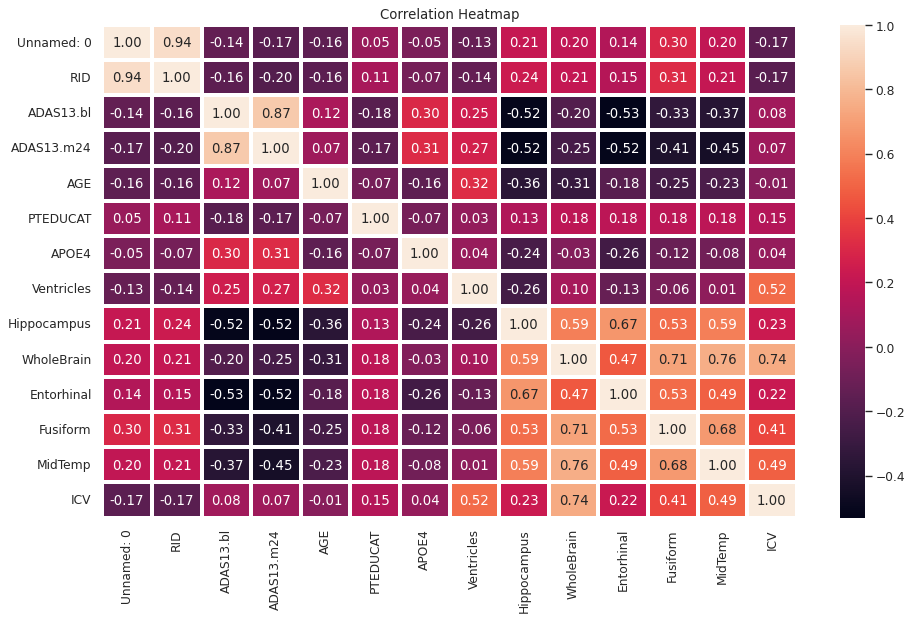

In [9]:
sns.set(rc={'figure.figsize': (14,8)})
sns.heatmap(d.corr(numeric_only=True), annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

# DATA PRE_PROCESSING (added section)
preparation our data to be modelled

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine, tune, and fit that model. You are strongly encouraged to explore different models (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should briefly mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model with interactions, a polynomial regression, and a lasso model and ultimately settled on the lasso approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail the development of the lasso model in terms of features used and additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline linear regression model on the test data but only briefly describe the baseline model considered*

In [23]:
rng = np.random.seed(0)

In [24]:
from sklearn.model_selection import train_test_split

X = d.drop('ADAS13.m24', axis = 1) # Set of features
y = d['ADAS13.m24']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = rng)

Make a split the data randomly into training (70%) and test (30%) sets

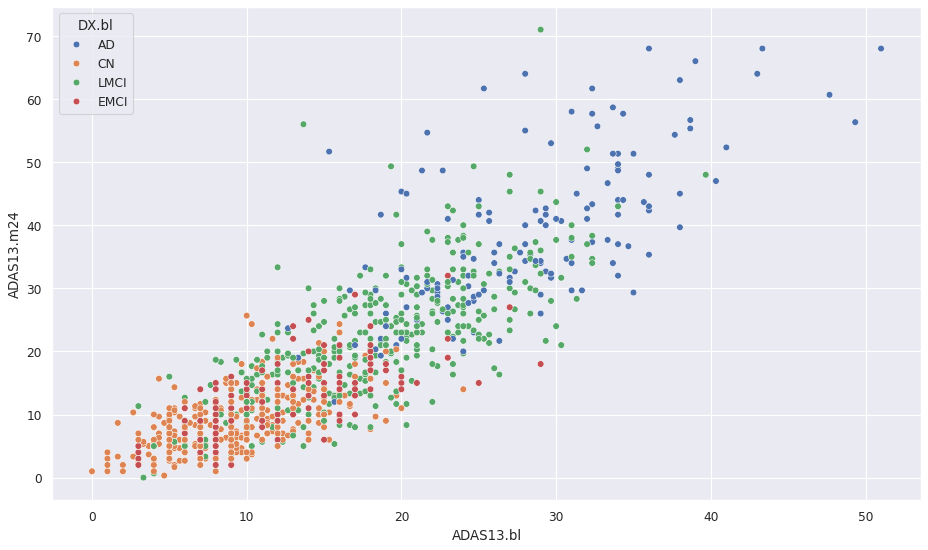

In [25]:
sns.scatterplot(x="ADAS13.bl", y="ADAS13.m24", hue="DX.bl", data = d)
plt.show()

This chart shows that baseline diagnosis has a significant impact on future cognitive decline, with those with Alzheimer's disease (AD) experiencing the most significant cognitive decline, while those with normal cognition (CN) largely maintain lower ADAS scores.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assume your DataFrame is called d
# 1. Perform one-hot encoding on DX.bl (drop_first=True keeps one baseline category)
X = d[['ADAS13.bl']].copy()  # Select numerical features
DX_encoded = pd.get_dummies(d['DX.bl'], drop_first=False)  # One-hot encode DX.bl
X = pd.concat([X, DX_encoded], axis=1)  # Combine features

# 2. Define the target variable
y = d['ADAS13.m24']

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42
)

# (Optional) Ensure the data is float64
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.to_numpy(dtype=np.float64)
y_test = y_test.to_numpy(dtype=np.float64)

# 4. Use sklearn's LinearRegression to fit the model
lr = LinearRegression(fit_intercept=True)  # By default, an intercept is included
lr.fit(X_train, y_train)

# 5. Retrieve intercept and coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# If you want to compute the intercept for each diagnosis category (like in the original code):
col_list = X_train.columns.tolist()
print("Columns in X:", col_list)

# The baseline intercept corresponds to whichever category was dropped (in this case, CN if drop_first=True).
print("\nBaseline (CN) intercept:", lr.intercept_)

# Example: Suppose the columns are ['ADAS13.bl','EMCI','LMCI','AD'], in that order:
# Then you can find which indices correspond to EMCI, LMCI, AD
idx_EMCI = col_list.index('EMCI')
idx_LMCI = col_list.index('LMCI')
idx_AD   = col_list.index('AD')

# Each of these category’s intercept is the baseline intercept + that category’s coefficient
print("Intercept for EMCI:", lr.intercept_ + lr.coef_[idx_EMCI])
print("Intercept for LMCI:", lr.intercept_ + lr.coef_[idx_LMCI])
print("Intercept for AD:  ", lr.intercept_ + lr.coef_[idx_AD])


Intercept: 3.334253321896888
Coefficients: [ 1.01202469  6.78609925 -3.7894157  -3.74266662  0.74598308]
Columns in X: ['ADAS13.bl', 'AD', 'CN', 'EMCI', 'LMCI']

Baseline (CN) intercept: 3.334253321896888
Intercept for EMCI: -0.4084132983544273
Intercept for LMCI: 4.080236398474052
Intercept for AD:   10.120352568392352


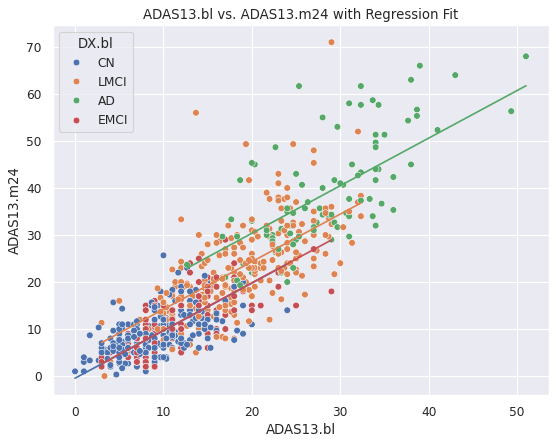

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Part a: 计算拟合值
yhat = X_train @ lr.coef_ + lr.intercept_  # 使用训练集计算预测值

# Part b: 绘制拟合值和散点图
plt.figure(figsize=(8,6))

# 绘制散点图（真实数据点）
ax = sns.scatterplot(x=X_train['ADAS13.bl'], y=y_train, hue=d.loc[X_train.index, 'DX.bl'])

# 绘制拟合线（线性回归预测值）
sns.lineplot(x=X_train['ADAS13.bl'], y=yhat, hue=d.loc[X_train.index, 'DX.bl'], ax=ax, legend=False)

# 设置图例和标签
ax.set(xlabel='ADAS13.bl', ylabel='ADAS13.m24', title='ADAS13.bl vs. ADAS13.m24 with Regression Fit')

# 显示图形
plt.show()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

def model_fit_plot(lr_model, X_train, y_train):
    """
    lr_model:  A fitted linear regression model (e.g., sklearn's LinearRegression).
    X_train:   Training feature set (DataFrame or array).
    y_train:   Actual target values (array-like).
    """
    # 1. Use the model to get predictions on the training data
    y_hat = lr_model.predict(X_train)

    # 2. Compute metrics
    mse = mean_squared_error(y_train, y_hat)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_hat)

    # 3. Plot
    fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

    # (A) Observed vs. Fitted
    axs[0].scatter(y_train, y_hat, alpha=0.7)
    # Plot the diagonal line y=x for reference
    min_val = min(y_train.min(), y_hat.min())
    max_val = max(y_train.max(), y_hat.max())
    axs[0].plot([min_val, max_val], [min_val, max_val], 'r--')
    axs[0].set_xlabel("Observed (y)")
    axs[0].set_ylabel("Fitted (y_hat)")
    axs[0].set_title("Observed vs. Fitted Values")

    # (B) Fitted vs. Residuals
    residuals = y_train - y_hat
    axs[1].scatter(y_hat, residuals, alpha=0.7)
    axs[1].axhline(y=0, color='r', linestyle='--')
    axs[1].set_xlabel("Fitted (y_hat)")
    axs[1].set_ylabel("Residuals")
    axs[1].set_title("Fitted Values vs. Residuals")

    # Add MSE, RMSE, and R² to the figure title
    fig.suptitle(f"Model (MSE={mse:.3f}, RMSE={rmse:.3f}, R²={r2:.3f})", fontsize=14)
    plt.tight_layout()
    plt.show()

    return mse, rmse, r2


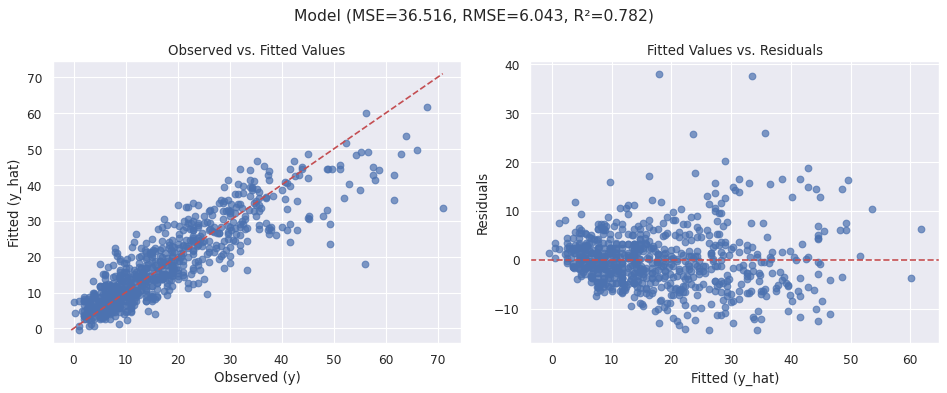

In [29]:
mse, rmse, r2 = model_fit_plot(lr, X_train, y_train)


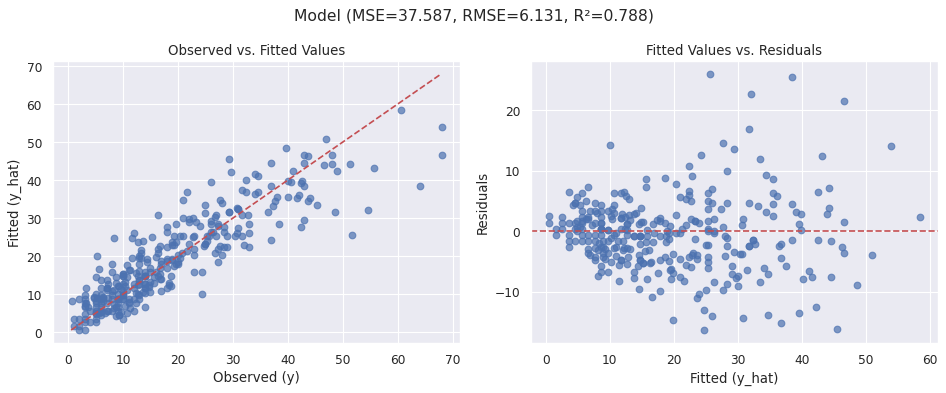

In [30]:
mse, rmse, r2 = model_fit_plot(lr, X_test, y_test)

As can be seen from the figure, there is a strong linear consistency between the actual values and the predicted values, and the R^2 =0.78 also indicates that the model has a certain degree of interpretation of the data. However, more obvious positive and negative fluctuations can still be seen in the residual plots, indicating that the model has a larger prediction error for some intervals, and there may still be some patterns or noise that are not captured by the linear model; on the whole, the model has a certain degree of predictive ability, but if we want to further improve the accuracy, we need to consider richer features or improve the model structure.


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler




# 1. Select numeric variables (exclude RID to avoid useless data)
numerical_features = ['ADAS13.bl', 'AGE', 'PTEDUCAT', 'APOE4', 
                      'Ventricles', 'Hippocampus', 'WholeBrain', 
                      'Entorhinal', 'Fusiform', 'MidTemp', 'ICV']

X = d[numerical_features].copy()  # Select only numeric variables

# 2. Perform One-Hot coding (transformation of categorical variables)
categorical_features = ['DX.bl', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']
X_encoded = pd.get_dummies(d[categorical_features], drop_first=True)  # One-Hot 

# 3. Combine all variables
X = pd.concat([X, X_encoded], axis=1)


In [33]:
# 4. target variable
y = d['ADAS13.m24']
X = X.dropna()
y = y.loc[X.index] 
# 5. Training set/test set splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=rng
)


# 6. Perform data standardization (to prevent numerical features from affecting regression results)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 7. linear regression (math.)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_scaled, y_train)

# 8. Output regression results
print("Intercept:", lr.intercept_)
print("\nFeature Coefficients:")

# Output the variables and regression coefficients correspondingly
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef}")

# 9. Calculation Model R² Score
train_score = lr.score(X_train_scaled, y_train)
test_score = lr.score(X_test_scaled, y_test)

print("\nTraining R² Score:", train_score)
print("Testing R² Score:", test_score)

Intercept: 17.357754442649433

Feature Coefficients:
ADAS13.bl: 8.036318908372905
AGE: -1.052116194441575
PTEDUCAT: 0.010859937286494536
APOE4: 0.6809655824586994
Ventricles: 0.8424029240102061
Hippocampus: 0.3152395410817972
WholeBrain: -0.7444101694733404
Entorhinal: 0.035299400617109296
Fusiform: -0.7879923841507722
MidTemp: -1.6151226306663589
ICV: 1.2389941745382036
DX.bl_CN: -4.682392493999671
DX.bl_EMCI: -3.839849521640941
DX.bl_LMCI: -3.5611463389749387
PTGENDER_Male: 0.05489774851516085
PTETHCAT_Not Hisp/Latino: -0.10468672670215624
PTETHCAT_Unknown: -0.16376071245556936
PTRACCAT_Asian: 0.21994433315947137
PTRACCAT_Black: 0.03333372560464989
PTRACCAT_Hawaiian/Other PI: -0.23120735918168936
PTRACCAT_More than one: 0.09237994868083221
PTRACCAT_Unknown: 0.16525888502246952
PTRACCAT_White: 0.5971988028247489
PTMARRY_Married: -0.005148660829060729
PTMARRY_Never married: 0.09473292502826576
PTMARRY_Unknown: 0.15660129670356546
PTMARRY_Widowed: 0.4399890183281942

Training R² Score: 

The model’s output shows that baseline ADAS13 score (ADAS13.bl) and the APOE4 allele have strong positive coefficients, indicating they are key predictors of the 24-month cognitive score. Several other brain volume measures (like Ventricles, Hippocampus, ICV) also play notable roles. Diagnoses labeled CN, EMCI, and LMCI have negative coefficients relative to the reference category (likely indicating less cognitive decline compared to AD). Overall, with a training \(R^2 \approx 0.838\) and a test \(R^2 \approx 0.802\), the model demonstrates both good fit on the training set and strong generalization on the test set, suggesting a reasonably robust linear relationship.

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, estimated parameters and relationships, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a health official or charity director, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on factors that may increase the risk of higher cognitive decline, which may be useful for identiying individuals that may benefit more from any proposed drugs or therapies.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# Generative AI statement

*Include a statement on how generative AI was used in the project and report.*

# References

*Include references if any*

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1.ipynb